Clustering

In [7]:
# Step 5.1: Preparing the data for the Lookalike Model

# Merging customer and transaction data to get product purchase history per customer
customer_transactions = pd.merge(transactions, customers, on='CustomerID', how='inner')
customer_transactions = pd.merge(customer_transactions, products, on='ProductID', how='inner')

# Aggregating purchase information by customer
customer_profile = customer_transactions.groupby(['CustomerID', 'ProductID']).agg(
    TotalAmountSpent=('TotalValue', 'sum'),
    TotalQuantity=('Quantity', 'sum')
).reset_index()

# Pivot table to get a matrix of customers vs products
customer_pivot = customer_profile.pivot_table(index='CustomerID', columns='ProductID', values='TotalAmountSpent', fill_value=0)

# Display the customer-product matrix
customer_pivot.head()


ProductID,P001,P002,P003,P004,P005,P006,P007,P008,P009,P010,...,P091,P092,P093,P094,P095,P096,P097,P098,P099,P100
CustomerID,,,,,,,,,,,,,,,,,,,,,
C0001,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,614.94,0.00,0.0,0.0,0.0
C0002,0.0,0.0,0.0,382.76,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,454.52,0.00,0.00,0.0,0.0,0.0
C0003,0.0,1385.2,0.0,0.00,0.0,363.96,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0
C0004,0.0,0.0,0.0,0.00,0.0,0.00,0.0,293.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,958.02,0.0,0.0,0.0
C0005,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0


In [8]:
# Step 5.2: Compute cosine similarity between customers based on their product purchase history

# Normalize the data to scale the features
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_pivot)

# Compute cosine similarity
cosine_sim = cosine_similarity(customer_scaled)

# Convert cosine similarity to DataFrame for easier handling
cosine_sim_df = pd.DataFrame(cosine_sim, index=customer_pivot.index, columns=customer_pivot.index)

# Display similarity matrix
cosine_sim_df.head()


CustomerID,C0001,C0002,C0003,C0004,C0005,C0006,C0007,C0008,C0009,C0010,...,C0191,C0192,C0193,C0194,C0195,C0196,C0197,C0198,C0199,C0200
CustomerID,,,,,,,,,,,,,,,,,,,,,
C0001,1.000000,-0.048829,-0.061476,-0.079060,-0.051689,-0.064034,0.155253,-0.070888,-0.045940,-0.051430,...,0.020577,-0.056895,-0.058268,0.404928,-0.081427,-0.053254,-0.053059,-0.038385,0.349028,-0.067244
C0002,-0.048829,1.000000,-0.035699,-0.051683,-0.023066,-0.033697,-0.022453,0.247217,-0.001006,-0.028179,...,-0.037930,-0.026486,-0.032004,-0.048461,-0.050541,-0.027361,-0.025479,-0.001653,-0.034533,-0.040300
C0003,-0.061476,-0.035699,1.000000,0.040222,0.244296,-0.046598,-0.033438,0.235872,-0.038271,-0.037193,...,-0.049557,-0.042124,-0.042122,-0.057017,-0.057647,-0.038891,-0.039122,-0.031808,-0.047667,-0.047907
C0004,-0.079060,-0.051683,0.040222,1.000000,0.079853,-0.065466,-0.049865,-0.013040,-0.098337,0.041381,...,-0.066124,-0.065825,-0.056596,0.011051,-0.066194,-0.055914,-0.059661,-0.080364,0.132184,-0.057853
C0005,-0.051689,-0.023066,0.244296,0.079853,1.000000,-0.032509,-0.019852,-0.052323,0.026965,-0.028529,...,-0.038787,0.232636,-0.032494,0.110476,-0.058034,-0.025598,-0.021636,0.020768,-0.033383,-0.044805


In [13]:
# Step 5.3: Generate recommendations for customers C0001 to C0020

lookalike_recommendations = {}

for customer_id in range(1, 21):
    customer_similarities = cosine_sim_df.loc[f'C{customer_id:04d}']
    top_3_similar_customers = customer_similarities.sort_values(ascending=False)[1:4]
    lookalike_recommendations[f'C{customer_id:04d}'] = top_3_similar_customers

# Convert to DataFrame
lookalike_df = pd.DataFrame.from_dict(lookalike_recommendations, orient='index')

# Save lookalike recommendations to a CSV file
lookalike_df.to_csv('Anusha_Khot_Lookalike.csv', index=False)

# Display the recommendations
lookalike_df.head()


,C0194,C0104,C0020,C0030,C0091,C0071,C0181,C0134,C0144,C0070,...,C0187,C0064,C0052,C0024,C0037,C0177,C0115,C0084,C0026,C0007
C0001,0.404928,0.374002,0.366609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C0020,NaN,0.472465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.627069,0.456615
C0007,NaN,NaN,0.456615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C0002,NaN,NaN,NaN,0.404617,0.383778,0.320158,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C0008,NaN,NaN,NaN,NaN,0.260560,NaN,NaN,NaN,0.326751,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Step 6.1: Preparing data for clustering

# Aggregating customer transactions by product category
category_sales = customer_transactions.groupby(['CustomerID', 'Category']).agg(
    TotalAmountSpent=('TotalValue', 'sum')
).reset_index()

# Pivoting to get customer vs category matrix
category_pivot = category_sales.pivot_table(index='CustomerID', columns='Category', values='TotalAmountSpent', fill_value=0)

# Scaling data for clustering
category_scaled = scaler.fit_transform(category_pivot)

# Display the data
category_pivot.head()


Category,Books,Clothing,Electronics,Home Decor
CustomerID,,,,
C0001,114.60,0.00,2827.30,412.62
C0002,0.00,1025.46,0.00,837.28
C0003,0.00,122.36,1385.20,1217.82
C0004,1888.48,0.00,1355.74,2110.66
C0005,0.00,0.00,1180.38,853.86


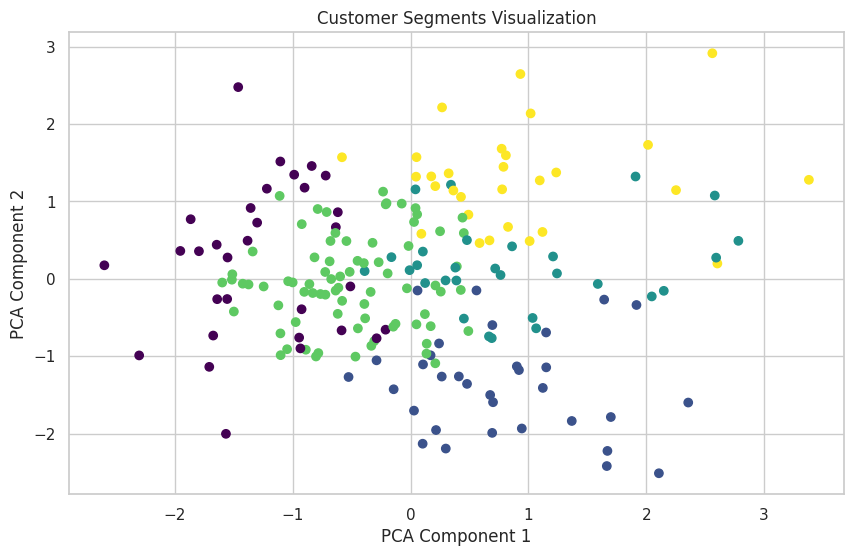

DB Index:  1.108179281522266


Category,Books,Clothing,Electronics,Home Decor,Cluster
CustomerID,,,,,
C0001,114.60,0.00,2827.30,412.62,1
C0002,0.00,1025.46,0.00,837.28,3
C0003,0.00,122.36,1385.20,1217.82,3
C0004,1888.48,0.00,1355.74,2110.66,0
C0005,0.00,0.00,1180.38,853.86,3


In [14]:
# Step 6.2: Applying KMeans clustering

# Let's test with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(category_scaled)

# Add cluster labels to the original data
category_pivot['Cluster'] = kmeans.labels_

# Visualizing the clusters using a scatter plot (2D PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(category_scaled)

plt.figure(figsize=(10,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=category_pivot['Cluster'], cmap='viridis')
plt.title('Customer Segments Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Calculate DB Index
db_index = davies_bouldin_score(category_scaled, kmeans.labels_)
print("DB Index: ", db_index)

# Save clustering results to a CSV file
category_pivot.to_csv('Anusha_Khot_Customer_Segmentation.csv', index=False)

# Display final results
category_pivot.head()



In [12]:
# Step 7: Save all final outputs as required

# Save clustering results to a CSV file
category_pivot.to_csv('Customer_Segmentation.csv')

# Display final results
category_pivot.head()


Category,Books,Clothing,Electronics,Home Decor,Cluster
CustomerID,,,,,
C0001,114.60,0.00,2827.30,412.62,1
C0002,0.00,1025.46,0.00,837.28,3
C0003,0.00,122.36,1385.20,1217.82,3
C0004,1888.48,0.00,1355.74,2110.66,0
C0005,0.00,0.00,1180.38,853.86,3
